# Predict A Doctor's Consultation Fee 

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.


In [64]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [65]:
#loading dataset
df_train=pd.read_excel("Final_Train.xlsx")
df_test=pd.read_excel("Final_Test.xlsx")

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [68]:
#creating column source for further analysis
df_train["source"]="train"
df_test["source"]="test"

In [69]:
#concatinating test and train dataset
df_doc=pd.concat([df_train,df_test])
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [70]:
#lets reset the index
df_doc.reset_index(drop=True,inplace=True)
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [71]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   source              7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


In [72]:
#lets chcek the null values
df_doc.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

In [73]:
#Lets chcek the value counts of object type columns
for col in df_doc.columns:
    if df_doc[col].dtype=="object":
        print(df_doc[col].value_counts())
        print()

BDS                                                                                              632
BHMS                                                                                             627
BAMS                                                                                             624
MBBS                                                                                             441
MBBS, MS - ENT                                                                                   280
                                                                                                ... 
MBBS, MD - Dermatology , Venereology & Leprosy, DLO                                                1
BAMS, Certificate in Child Health (CCH), Post Graduate Diploma in Clinical Research (PGDCR)        1
MBBS, DNB - Internal Medicine, Post Graduate Course in Rheumatology                                1
BDS, Post Graduate Diploma in Orthodontics                                                 

In [74]:
#Miscellaneous_Info is a special information unique to the doctor,so its impossible to impute it
#So we will drop replace null values as missing
#df_doc.drop(columns=["Miscellaneous_Info"],inplace=True)
df_doc["Miscellaneous_Info"].fillna("missing",inplace=True)

In [75]:
#We can convert experience column to datatype int
#At fisrt we need to strip of " years experience"
df_doc["Experience"]=df_doc["Experience"].str.strip(" years experience")

In [76]:
#lets see the Experice column
df_doc["Experience"]

0       24
1       12
2        9
3       12
4       20
        ..
7943    10
7944     4
7945     9
7946    12
7947     8
Name: Experience, Length: 7948, dtype: object

In [77]:
#Now we need to convert the Experience column to int
df_doc["Experience"]=df_doc["Experience"].astype(int)

In [78]:
#lets chcek the datatype of the columns in datasets
df_doc.dtypes

Qualification          object
Experience              int32
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

In [79]:
#Rating grouped by profile
df_doc.groupby(["Profile"]).agg({"Rating":lambda x: x.value_counts().index[0]})

,Rating
Profile,
Ayurveda,100%
Dentist,100%
Dermatologists,100%
ENT Specialist,100%
General Medicine,100%
Homeopath,100%


In [80]:
#Lets strip the"%" of Rating
df_doc["Rating"]=df_doc["Rating"].str.strip("%")

In [81]:
#Converting Rating to float 
df_doc["Rating"]=df_doc["Rating"].astype(float)

In [82]:
df_doc["Rating"]

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
7943      NaN
7944      NaN
7945      NaN
7946     98.0
7947      NaN
Name: Rating, Length: 7948, dtype: float64

In [83]:
#Lets chcek the rows where null values are there
df_doc.loc[df_doc["Rating"].isnull()]
#Here we see in most of "Rating" is nan where miscellaneous_info is missing

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,missing,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,missing,100.0,train
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,missing,200.0,train
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,missing,100.0,train
...,...,...,...,...,...,...,...,...
7942,"MBBS, MD - Dermatology , Venereology & Leprosy...",8,NaN,"Lajpat Nagar III, Delhi",Dermatologists,missing,NaN,test
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,missing,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,missing,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,missing,NaN,test


In [84]:
#Lets replace the null values in rating with 0
df_doc["Rating"].fillna(0,inplace=True)

In [85]:
#chceking null values again
df_doc.isnull().sum()
#Fees what ever null count  is there is what needs to predicted and is part of test dataset
#So we are left with "Place" column which needs to be imputed

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [86]:
#Lets chcek the value counts
df_doc["Place"].value_counts()

Andheri West, Mumbai                97
HSR Layout, Bangalore               97
Dwarka, Delhi                       93
Banjara Hills, Hyderabad            85
Mulund West, Mumbai                 81
                                    ..
Venjaramoodu, Thiruvananthapuram     1
Gandhi Nagar, Delhi                  1
Lingarajapuram, Bangalore            1
Paruthippara, Thiruvananthapuram     1
Connaught Place, Delhi               1
Name: Place, Length: 948, dtype: int64

In [87]:
#This will have 5 places where maximum number of doctors sit
top_doc_places=df_doc["Place"].value_counts().index[0:5]

In [88]:
null_condition=df_doc[["Place"]].isnull()
null_condition

,Place
0,False
1,False
2,False
3,False
4,False
...,...
7943,False
7944,False
7945,False
7946,False


In [89]:
#We  will impute the null values with fisrt top 5 popular places where doctor sit
null_condition=df_doc[["Place"]].isnull()
count=0
for index_null in null_condition.index:
    if null_condition.loc[index_null][0]==True:
        if count%5==0:
            df_doc.loc[index_null,["Place"]]=top_doc_places[0]
        if count%5==1:
            df_doc.loc[index_null,["Place"]]=top_doc_places[1]
        if count%5==2:
            df_doc.loc[index_null,["Place"]]=top_doc_places[2]
        if count%5==3:
            df_doc.loc[index_null,["Place"]]=top_doc_places[3]
        if count%5==4:
            df_doc.loc[index_null,["Place"]]=top_doc_places[4]
        count=count+1

In [90]:
#Lets again chcek null values
df_doc.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [91]:
#value counts for place
df_doc["Place"].value_counts()
#There fore we have evenly imputed the null values with top 5 places

Andheri West, Mumbai                104
HSR Layout, Bangalore               103
Dwarka, Delhi                        99
Banjara Hills, Hyderabad             91
Mulund West, Mumbai                  87
                                   ... 
Venjaramoodu, Thiruvananthapuram      1
Gandhi Nagar, Delhi                   1
Lingarajapuram, Bangalore             1
Paruthippara, Thiruvananthapuram      1
Connaught Place, Delhi                1
Name: Place, Length: 948, dtype: int64

In [92]:
#Now we will divide the Place column into multiple columns
#First we will find maximum Length 
max_address_length=-1
for i in range(len(df_doc["Place"])):
    temp=len(df_doc["Place"].iloc[i].strip().upper().split(","))
    if temp>max_address_length:
        max_address_length=temp
print("Max address length is :{}".format(max_address_length))

Max address length is :3


In [93]:
p1=list()
p2=list()
p3=list()
for i in range(len(df_doc["Place"])):
    temp=df_doc["Place"].iloc[i].split(",")
    try :
        p1.append(temp[0].strip().upper())
    except :
        p1.append('NONE')
    try :
        p2.append(temp[1].strip().upper())
    except :
        p2.append('NONE')
    try :
        p3.append(temp[2].strip().upper())
    except :
        p3.append('NONE')

In [94]:
df_doc["p1"]=p1
df_doc["p2"]=p2
df_doc["p3"]=p3

In [95]:
df_doc.loc[df_doc["p3"]!="NONE"]
#we see only one row is there where p3 contains anything leaving "NONE"

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,p1,p2,p3
2169,BDS,11,0.0,"Dwarka, Sector 5, Delhi",Dentist,missing,250.0,train,DWARKA,SECTOR 5,DELHI


In [96]:
#lets change replace p2 by "DELHI" and then drop the entire p3 column
df_doc.loc[df_doc["p3"]!="NONE", ['p2']] = df_doc[['p3']]

In [97]:
df_doc["p2"].fillna("DELHI",inplace=True)

In [98]:
df_doc.loc[df_doc["p3"]!="NONE"]
#Now we see p2 contains "DELHI" so we can drop p3 as it is having no variance

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,p1,p2,p3
2169,BDS,11,0.0,"Dwarka, Sector 5, Delhi",Dentist,missing,250.0,train,DWARKA,DELHI,DELHI


In [99]:
#As discussed above lets drop "p3" and "Place"
df_doc.drop(columns=["p3","Place"],inplace=True)

In [100]:
#Lets divide "Qualification" column also into multiple columns
#so we will do similar activity what we did for "Place"
#First we will find maximum Length 
max_qual_length=-1
for i in range(len(df_doc["Qualification"])):
    temp=len(df_doc["Qualification"].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print("Max qualification length is :{}".format(max_qual_length))

Max qualification length is :17


In [101]:
q1=list()
q2=list()
q3=list()
q4=list()
q5=list()
q6=list()
q7=list()
q8=list()
q9=list()
q10=list()
q11=list()
q12=list()
q13=list()
q14=list()
q15=list()
q16=list()
q17=list()
for i in range(len(df_doc["Qualification"])):
    temp=df_doc["Qualification"].iloc[i].split(",")
    try :
        q1.append(temp[0].strip().upper())
    except :
        q1.append('NONE')
    try :
        q2.append(temp[1].strip().upper())
    except :
        q2.append('NONE')
    try :
        q3.append(temp[2].strip().upper())
    except :
        q3.append('NONE')
    try :
        q4.append(temp[3].strip().upper())
    except :
        q4.append('NONE')
    try :
        q5.append(temp[4].strip().upper())
    except :
        q5.append('NONE')
    try :
        q6.append(temp[5].strip().upper())
    except :
        q6.append('NONE')
    try :
        q7.append(temp[6].strip().upper())
    except :
        q7.append('NONE')
    try :
        q8.append(temp[7].strip().upper())
    except :
        q8.append('NONE')
    try :
        q9.append(temp[8].strip().upper())
    except :
        q9.append('NONE')
    try :
        q10.append(temp[9].strip().upper())
    except :
        q10.append('NONE')
    try :
        q11.append(temp[10].strip().upper())
    except :
        q11.append('NONE')
    try :
        q12.append(temp[11].strip().upper())
    except :
        q12.append('NONE')
    try :
        q13.append(temp[12].strip().upper())
    except :
        q13.append('NONE')
    try :
        q14.append(temp[13].strip().upper())
    except :
        q14.append('NONE')
    try :
        q15.append(temp[14].strip().upper())
    except :
        q15.append('NONE')
    try :
        q16.append(temp[15].strip().upper())
    except :
        q16.append('NONE')
    try :
        q17.append(temp[16].strip().upper())
    except :
        q17.append('NONE')

In [102]:
df_doc["q1"]=q1
df_doc["q2"]=q2
df_doc["q3"]=q3
df_doc["q4"]=q4
df_doc["q5"]=q5
df_doc["q6"]=q6
df_doc["q7"]=q7
df_doc["q8"]=q8
df_doc["q9"]=q9
df_doc["q10"]=q10
df_doc["q11"]=q11
df_doc["q12"]=q12
df_doc["q13"]=q13
df_doc["q14"]=q14
df_doc["q15"]=q15
df_doc["q16"]=q16
df_doc["q17"]=q17

In [103]:
df_doc.loc[(df_doc["q8"]!="NONE")|(df_doc["q9"]!="NONE")|(df_doc["q10"]!="NONE")|(df_doc["q11"]!="NONE")|(df_doc["q12"]!="NONE")|(df_doc["q13"]!="NONE")|(df_doc["q14"]!="NONE")|(df_doc["q15"]!="NONE")|(df_doc["q16"]!="NONE")|(df_doc["q17"]!="NONE")]
#There are only 8  rows with where either of q8 to 17 is not "NONE",so basically q8 to q17 we can simply drop

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,p1,p2,q1,...,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
1593,"Diploma in Diet and Nutrition, BHMS, Diploma i...",10,99.0,Homeopath,Dermabrasion Laser Resurfacing Acne / Pimples ...,500.0,train,GHATKOPAR EAST,MUMBAI,DIPLOMA IN DIET AND NUTRITION,...,FILLERS,THREADLIFTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,97.0,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300.0,train,ASHOK NAGAR,CHENNAI,FELLOWSHIP IN ORAL IMPLANTLOGY,...,FELLOWSHIP IN ADVANCED ENDOSCOPIC SINUS SURGERY,DEGREE IN DENTAL IMPLANT,FELLOWSHIP IN LASERS & COSMETOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3562,"MBBS, Diploma in Family Medicine (DFM), Certif...",5,0.0,General Medicine,missing,700.0,train,COIMBATORE RACECOURSE,COIMBATORE,MBBS,...,CCMTD,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3580,"MBBS, MD - General Medicine, Post Graduate Dip...",17,88.0,General Medicine,Non-Invasive Cardiology Chest Pain Treatment C...,100.0,train,GREATER KAILASH PART 1,DELHI,MBBS,...,POST GRADUATE CERTIFICATE IN SPORTS MEDICINE,CLINICAL CARDIOLOGY CERTIFICATION,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4174,"MBBS, DNB - General Medicine, FRCP, Post Gradu...",29,76.0,General Medicine,"76% 8 Feedback Old Rajendra Nagar, Delhi",100.0,train,OLD RAJENDRA NAGAR,DELHI,MBBS,...,EULAR CERTIFICATE FOR RHEUMATIC DISEASES,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5667,"MD - CCM, MD - Physician, Post Graduate Diplom...",13,0.0,General Medicine,missing,300.0,train,PUNJAGUTTA,HYDERABAD,MD - CCM,...,POST GRADUATE DIPLOMA IN DIABETOLOGY (PGDD),MD - CARDIOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
7248,"BDS, PG Diploma in Conservative, Endodontics a...",4,100.0,Dentist,Dental Crowns Dental Fillings Dental Implant F...,NaN,test,NEW ASHOK NAGAR,DELHI,BDS,...,FELLOW OF ACADEMY OF GENERAL EDUCATION (FAGE),ADVANCED RETREATMENT COURSE IN RCT,ADVANCED ENDOTONTIC COURSE ON ROOT CANAL,CERTIFIED COURSE IN ORAL SURGERY,MIDA,CERTIFICATION IN PROSTHODONTICS & PERIODONTOLOGY,CERTIFIED ADVANCED COURSE IN WISDOM TOOTH EXTR...,CERTIFICATE IN COSMETIC DENTISTRY,FELLOWSHIP IN AESTHETIC DENTISTRY (FAD),POST GRADUATE CERTIFICATE IN ENDODONTICS (PGCE)
7249,"FAMS - Fellowship of the Academy Medicine, MBB...",28,60.0,ENT Specialist,"60% 1 Feedback AS Rao Nagar, Hyderabad",NaN,test,AS RAO NAGAR,HYDERABAD,FAMS - FELLOWSHIP OF THE ACADEMY MEDICINE,...,COCHLEAR IMPLANT SURGERY,ADVANCE COURSE ON DIAGNOSIS OF ALLERGY AND IMM...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [104]:
#dropping q8 to q17 as it is importnat only for 8 rows as discussed sbove
df_doc.drop(columns=["q8","q9","q10","q11","q12","q13","q14","q15","q16","q17"],inplace=True)

In [105]:
#Lets drop "Qualification" column
df_doc.drop(columns=["Qualification"],inplace=True)

In [106]:
df_doc["Miscellaneous_Info"].value_counts()

missing                                                                      3454
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth             50
Skin Allergy Treatment Skin Allergies Dermabrasion                             18
Tooth Extraction Dental Fillings Scaling / Polishing                           16
Dental Fillings Zirconia Crowns Dental Implant Fixing                          15
                                                                             ... 
47% 9 Feedback Old Airport Road, Bangalore                                      1
Cast Partial Denture Conservative Dentistry Cosmetic/ Aesthetic Dentistry       1
HIV Counselling Infectious Disease Treatment Health Checkup (General)           1
Crowns and Bridges Fixing Dental Implant Fixing Flap Surgery                    1
99% 23 Feedback Tambaram East, Chennai                                          1
Name: Miscellaneous_Info, Length: 3981, dtype: int64

In [107]:
#Now lets process the description column so that we can use it in K means
#Below function we will use to clean the Description column
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() #Initialising the lemmatizer
def clean(text):
    newstring=""
    text=re.sub("[\W*]"," ",text)
    text=re.sub("\d+[a-z]*"," ",text)
    text=re.sub("\s+"," ",text)
    count=0
    for word in text.split():
        if word not in stop_words:
            word=lemmatizer.lemmatize(word)
            if count==0:
                newstring=newstring+word
            if count!=0:
                newstring=newstring+" "+word
            count=count+1
    return newstring

In [108]:
df_doc["Miscellaneous_Info"]=df_doc["Miscellaneous_Info"].apply(lambda x: clean(x))

In [109]:
#Lets use tf-idf to convert Description into integers
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
miss_info = vectorizer.fit_transform(df_doc["Miscellaneous_Info"].to_list())
miss_info.shape

(7948, 1000)

In [110]:
df_doc_final=pd.concat([df_doc,pd.DataFrame(miss_info.toarray())],axis=1)

In [111]:
#lets drop the "Miscellaneous_Info" column
df_doc.drop(columns=["Miscellaneous_Info"],inplace=True)

In [112]:
#Lets do some grpahical analysis

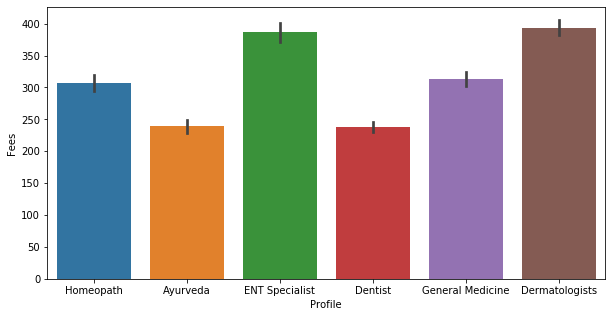

In [113]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_doc_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

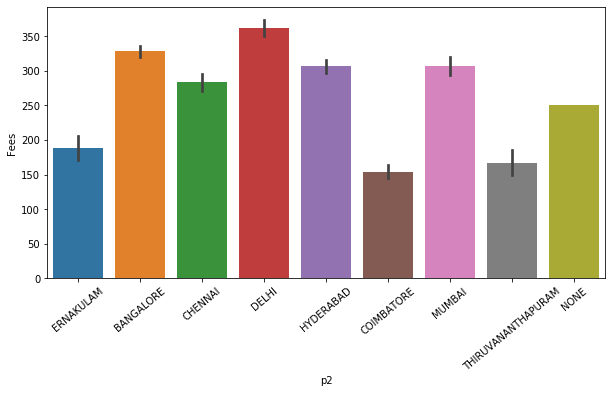

In [114]:
#lets check the averge rate of doctors in a city
plt.figure(figsize=(10,5))
sns.barplot(x="p2",y="Fees",data=df_doc_final)
plt.xticks(rotation=40)
plt.show()
#In delhi averge fees is maximum compared to other cities

In [115]:
df_doc_final.columns

Index([        'Experience',             'Rating',            'Profile',
       'Miscellaneous_Info',               'Fees',             'source',
                       'p1',                 'p2',                 'q1',
                       'q2',
       ...
                        990,                  991,                  992,
                        993,                  994,                  995,
                        996,                  997,                  998,
                        999],
      dtype='object', length=1015)

In [116]:
from sklearn.preprocessing import LabelEncoder
for col in df_doc_final.columns:
    if df_doc_final[col].dtype=="object":
        df_doc_final[col]=LabelEncoder().fit_transform(df_doc_final[col])

In [117]:
df_doc_final

,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,p1,p2,q1,q2,...,990,991,992,993,994,995,996,997,998,999
0,24,100.0,5,968,100.0,1,321,4,8,302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,98.0,0,1300,350.0,1,926,0,5,292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,0.0,3,2362,300.0,1,492,0,102,396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.0,0,178,250.0,1,70,0,14,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,100.0,0,993,250.0,1,364,1,5,411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,10,0.0,0,2362,NaN,0,72,0,5,172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7944,4,0.0,2,2362,NaN,0,133,1,111,493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7945,9,0.0,4,2362,NaN,0,659,1,102,332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7946,12,98.0,1,1965,NaN,0,33,0,6,411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
#lets seprate test and train data
df_train=df_doc_final.loc[df_doc_final["source"]==1]
df_test=df_doc_final.loc[df_doc_final["source"]==0]

In [119]:
#Resetting the index
df_test.reset_index(drop=True,inplace=True)

In [120]:
#Dropping the source column
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
#Lets seprate the input and output from train dataset
df_x=df_train.drop(columns=["Fees"])
y=df_train[["Fees"]]

In [122]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_x)
X=pd.DataFrame(X,columns=df_x.columns)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [124]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 1013), (4470, 1), (1491, 1013), (1491, 1))

In [125]:
X_train.columns

Index([        'Experience',             'Rating',            'Profile',
       'Miscellaneous_Info',                 'p1',                 'p2',
                       'q1',                 'q2',                 'q3',
                       'q4',
       ...
                        990,                  991,                  992,
                        993,                  994,                  995,
                        996,                  997,                  998,
                        999],
      dtype='object', length=1013)

In [127]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_cv)
y_pred1 = y_pred1.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred1)))

RMSLE: 0.5823278847294342


In [128]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 152,   
         'learning_rate': 0.1,  
         'num_leaves': 52, 
         'max_depth': 28, 
         'min_data_in_leaf': 3, 
         'feature_fraction': 0.66,  
         'feature_fraction_seed': 10,
         'drop_seed': 4,
         'alpha': 100,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=0,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred2 = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred2)))

C:\Users\pc\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1759
[LightGBM] [Info] Number of data points in the train set: 4470, number of used features: 548
[LightGBM] [Info] Start training from score 307.347651
RMSLE: 0.5940293662939693


In [130]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, 
                      verbose=0)
br.fit(X_train, y_train)
y_pred5 = br.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred5)))
print('RMSE:', sqrt(mean_squared_error(y_cv, y_pred5)))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSLE: 0.6051860559629337
RMSE: 165.92165194435222


In [131]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(X_train, y_train)
y_pred3 = gb.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred3)))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSLE: 0.5870399774288234


In [132]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29,  
                           criterion='mse', 
                           max_depth=58,  
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20,  
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11)  
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred4)))

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RMSLE: 0.6117385543937554


In [133]:
y_predx = y_pred1*.4 + y_pred2*0.5 + y_pred3*0.1
y_predx = y_predx.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_predx)))

RMSLE: 0.5800739104105584


In [134]:
y_predy = y_pred1*0.40 + y_pred2*0.45 + y_pred3*0.10 + y_pred5*0.05
y_predy = y_predy.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_predy)))

RMSLE: 0.5795367057638082


In [135]:
y_pred = y_predx*.98 + y_predy*0.02
y_pred = y_pred.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred)))

RMSLE: 0.5799477120911097


In [136]:
#Now, predict on test set

In [138]:
X_train = X
y_train = y

In [142]:
df_test=df_test.drop(labels='Fees', axis=1)

In [143]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test= sc.fit_transform(df_test)
X_test=pd.DataFrame(X_test,columns=df_test.columns)

In [144]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_test)

In [145]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 137,   
         'learning_rate': 0.1,
         'num_leaves': 52,   
         'max_depth': 33,   
         'min_data_in_leaf': 3,  
         'feature_fraction': 0.54,  
         'feature_fraction_seed': 50,  
         'alpha': 100,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 train_set=train_data)

y_pred2 = lgbm.predict(X_test)

C:\Users\pc\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 5961, number of used features: 641
[LightGBM] [Info] Start training from score 307.944640


In [146]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, #4
                      verbose=0)
br.fit(X_train, y_train)
y_pred5 = br.predict(X_test)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [147]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2, #0.2
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11, #11, 
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(X_train, y_train)
y_pred3 = gb.predict(X_test)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29, #25, 29
                           criterion='mse', 
                           max_depth=58, #55, 58
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20, #0.20, 
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11) 
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [149]:
y_pred1.shape, y_pred2.shape, y_pred3.shape, y_pred4.shape, y_pred5.shape

((1987,), (1987,), (1987,), (1987,), (1987,))

In [150]:
y_predx = y_pred1*.4 + y_pred2*0.5 + y_pred3*0.10
y_predx = y_predx.astype(int)

In [151]:
y_predy = y_pred1*0.40 + y_pred2*0.45 + y_pred3*0.10 + y_pred5*0.05
y_predy = y_predy.astype(int)

In [152]:
y_pred = y_predx*.98 + y_predy*0.02
y_pred = y_pred.astype(int)

In [153]:
#write predictions to output file

In [154]:
df_sub = pd.DataFrame(data=y_pred, columns=['Fees'])
writer = pd.ExcelWriter('doctor_fees_predictions.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='doctor_fees_prediction', index=False)
writer.save()

***